In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import shutil
import numpy as np
from tqdm import tqdm
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
shape_path = '/content/drive/MyDrive/image_height_width.csv'
csv_path = '/content/drive/MyDrive/train.csv'
shape_csv = pd.read_csv(shape_path)
csv = pd.read_csv(csv_path)

In [ ]:
#see shape of csv file and none values
print('shape\n',csv.shape)
print('None values\n',csv.isna().sum())
print('number of dieases count\n',csv['class_id'].value_counts())

shape
 (67914, 8)
None values
 image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64
number of dieases count
 14    31818
0      7162
3      5427
11     4842
13     4655
8      2580
7      2483
10     2476
9      2203
6      1247
5      1000
2       960
4       556
1       279
12      226
Name: class_id, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


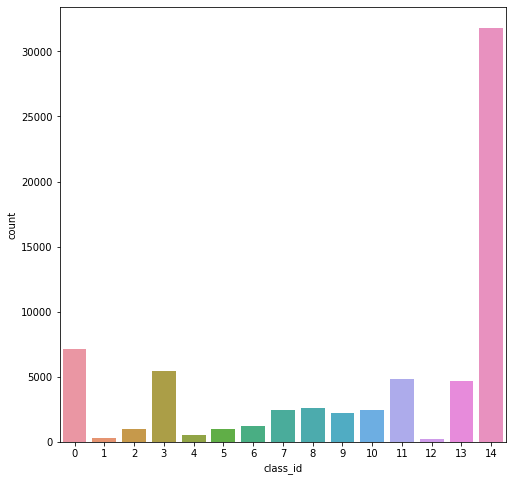

In [ ]:
# Visualize class_id counts
plt.figure(figsize=(8,8))
sns.countplot(csv['class_id'],label = 'count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


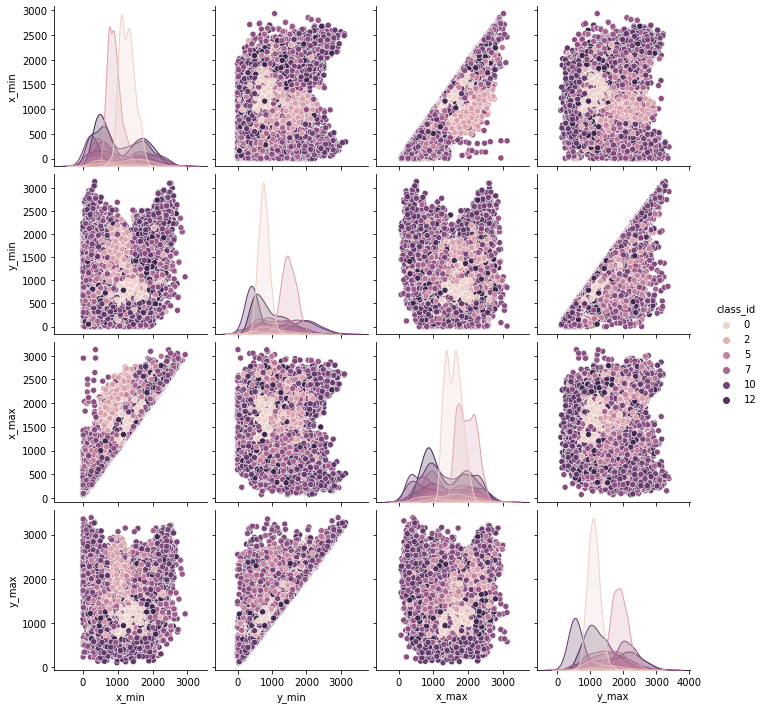

In [ ]:
#create pair plot
sns.pairplot(csv.iloc[:,1:],hue = 'class_id')

In [ ]:
 # ASSIGN lists to make csv file for new data
 image_id = []
 class_name = []
 class_id = []
 x_min = []
 y_min = []
 x_max = []
 y_max = []
 for indx , image in tqdm(enumerate(csv.image_id)):
        
        #GET data for each image
        img_id = image
        class_nam = csv.loc[indx]['class_name']
        clas_id = csv.loc[indx]['class_id']
        x_minm = csv.loc[indx]['x_min']
        y_minm = csv.loc[indx]['y_min']
        x_maxm = csv.loc[indx]['x_max']
        y_maxm = csv.loc[indx]['y_max']
        # DELETE duplicated images No finding
        if img_id in image_id and class_nam == 'No finding':
          pass
        else:
          #ADD data to lists
          image_id.append(img_id)
          class_name.append(class_nam)
          class_id.append(clas_id)
          x_min.append(x_minm)
          y_min.append(y_minm)
          x_max.append(x_maxm)
          y_max.append(y_maxm)
          


0it [00:00, ?it/s]
105it [00:00, 1046.51it/s]
201it [00:00, 1017.74it/s]
298it [00:00, 1002.53it/s]
390it [00:00, 974.00it/s] 
491it [00:00, 982.51it/s]
594it [00:00, 995.98it/s]
694it [00:00, 996.60it/s]
786it [00:00, 966.26it/s]
881it [00:00, 960.84it/s]
981it [00:01, 971.15it/s]
1076it [00:01, 928.41it/s]
1168it [00:01, 894.69it/s]
1257it [00:01, 866.28it/s]
1344it [00:01, 851.88it/s]
1429it [00:01, 839.05it/s]
1514it [00:01, 837.44it/s]
1598it [00:01, 817.62it/s]
1684it [00:01, 828.85it/s]
1777it [00:01, 854.93it/s]
1871it [00:02, 877.70it/s]
1971it [00:02, 911.01it/s]
2064it [00:02, 914.39it/s]
2156it [00:02, 898.21it/s]
2247it [00:02, 875.03it/s]
2335it [00:02, 870.97it/s]
2423it [00:02, 846.66it/s]
2508it [00:02, 830.53it/s]
2594it [00:02, 837.53it/s]
2682it [00:03, 849.13it/s]
2768it [00:03, 841.48it/s]
2854it [00:03, 844.81it/s]
2946it [00:03, 865.66it/s]
3035it [00:03, 872.31it/s]
3123it [00:03, 843.46it/s]
3215it [00:03, 863.89it/s]
3309it [00:03, 883.77it/s]
3398it [00:03,

In [ ]:
#make csv from lists include mean to the bound box from every radiologist to a certain disease
try_df = pd.DataFrame({'image_id':image_id,
                      'class_name':class_name,
                      'class_id':class_id,
                      'x_min':x_min,
                      'y_min':y_min,
                      'x_max':x_max,
                      'y_max':y_max})
see_df = try_df.groupby('class_id')[['x_min','y_min','x_max','y_max']].mean().round()
see_df = see_df.fillna(0)
see_df

,x_min,y_min,x_max,y_max
class_id,,,,
0,1263.0,757.0,1571.0,1100.0
1,903.0,727.0,1438.0,1363.0
2,1219.0,1028.0,1433.0,1304.0
3,890.0,1481.0,1961.0,1875.0
4,880.0,968.0,1361.0,1552.0
5,1015.0,889.0,1589.0,1926.0
6,984.0,870.0,1456.0,1492.0
7,949.0,1038.0,1357.0,1529.0
8,1154.0,1205.0,1325.0,1405.0


In [ ]:
 # ASSIGN lists to make csv file for new bound box data
 image_id = []
 class_name = []
 class_id = []
 x_min = []
 y_min = []
 x_max = []
 y_max = []
 for indx , image in tqdm(enumerate(csv.image_id)):
        
        #GET data for each image and replace bound box from see_df
        img_id = csv.loc[indx]['image_id']
        class_nam = csv.loc[indx]['class_name']
        clas_id = csv.loc[indx]['class_id']
        x_minm = see_df.loc[clas_id]['x_min']
        y_minm = see_df.loc[clas_id]['y_min']
        x_maxm = see_df.loc[clas_id]['x_max']
        y_maxm = see_df.loc[clas_id]['y_max']
        # DELETE duplicated images No finding
        if img_id in image_id and class_nam == 'No finding':
          pass
        else:
          #ADD data to lists
          image_id.append(img_id)
          class_name.append(class_nam)
          class_id.append(clas_id)
          x_min.append(x_minm)
          y_min.append(y_minm)
          x_max.append(x_maxm)
          y_max.append(y_maxm)



0it [00:00, ?it/s]
89it [00:00, 885.16it/s]
190it [00:00, 915.56it/s]
288it [00:00, 932.52it/s]
387it [00:00, 947.84it/s]
480it [00:00, 941.48it/s]
587it [00:00, 975.31it/s]
691it [00:00, 992.92it/s]
799it [00:00, 1017.35it/s]
901it [00:00, 1016.91it/s]
1000it [00:01, 1005.95it/s]
1102it [00:01, 1009.52it/s]
1202it [00:01, 993.30it/s] 
1301it [00:01, 966.28it/s]
1398it [00:01, 942.31it/s]
1492it [00:01, 918.31it/s]
1586it [00:01, 922.80it/s]
1690it [00:01, 953.42it/s]
1786it [00:01, 954.64it/s]
1883it [00:01, 955.01it/s]
1979it [00:02, 935.60it/s]
2075it [00:02, 941.71it/s]
2170it [00:02, 923.16it/s]
2267it [00:02, 936.34it/s]
2362it [00:02, 937.61it/s]
2457it [00:02, 940.62it/s]
2559it [00:02, 962.12it/s]
2659it [00:02, 972.24it/s]
2757it [00:02, 952.58it/s]
2859it [00:02, 971.78it/s]
2961it [00:03, 984.29it/s]
3061it [00:03, 988.20it/s]
3160it [00:03, 982.03it/s]
3259it [00:03, 976.02it/s]
3357it [00:03, 958.45it/s]
3453it [00:03, 931.58it/s]
3547it [00:03, 927.18it/s]
3642it [00:03

In [ ]:
# 21,212 deleted images No finding duplicated
len(image_id)

46702

In [ ]:
#MAKE dataframe from lists with new bound box
mean_df = pd.DataFrame({'image_id':image_id,
                      'class_name':class_name,
                      'class_id':class_id,
                      'x_min':x_min,
                      'y_min':y_min,
                      'x_max':x_max,
                      'y_max':y_max})

In [ ]:
mean_df

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0.0,0.0,0.0,0.0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0.0,0.0,0.0,0.0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,890.0,1481.0,1961.0,1875.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,1263.0,757.0,1571.0,1100.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
46697,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,930.0,1652.0,1297.0,2140.0
46698,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,1053.0,910.0,1380.0,1262.0
46699,22672ab82c290c20b86863291e25ef6c,ILD,5,1015.0,889.0,1589.0,1926.0
46700,db169d0be36123bd55b866d6aa73983b,Other lesion,9,981.0,1036.0,1348.0,1571.0


In [ ]:
#mean_df.to_csv('/content/drive/MyDrive/final work isa/source_mean_df.csv',index=False)

In [ ]:
shape_csv

,image_id,height,width
0,000434271f63a053c4128a0ba6352c7f,2836,2336
1,00053190460d56c53cc3e57321387478,2430,1994
2,0005e8e3701dfb1dd93d53e2ff537b6e,3072,3072
3,0006e0a85696f6bb578e84fafa9a5607,3000,3000
4,0007d316f756b3fa0baea2ff514ce945,2880,2304
...,...,...,...
14995,ffe6f9fe648a7ec29a50feb92d6c15a4,2857,2685
14996,ffea246f04196af602c7dc123e5e48fc,2430,1994
14997,ffeffc54594debf3716d6fcd2402a99f,2944,2464
14998,fff0f82159f9083f3dd1f8967fc54f6a,2500,2048


In [ ]:
# get width and height from original image
#load data in lists
names = shape_csv.iloc[:,0].values
height = shape_csv.iloc[:,1].values
width = shape_csv.iloc[:,2].values

#MAKE dic. with name and orignal width and height 
width_dic = dict(zip(names,width))
height_dic = dict(zip(names,height))

#functions to get width and height from dic.
def get_width(key):
    for ke , width in width_dic.items():
        if key == ke :
            return width
            
def get_height(key):
    for ke , height in height_dic.items():
        if key == ke :
            return height            

In [ ]:
#mean_df = pd.read_csv('/content/drive/MyDrive/final work isa/source_mean_df.csv')

In [ ]:
mean_df

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0.0,0.0,0.0,0.0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0.0,0.0,0.0,0.0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,890.0,1481.0,1961.0,1875.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,1263.0,757.0,1571.0,1100.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
46697,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,930.0,1652.0,1297.0,2140.0
46698,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,1053.0,910.0,1380.0,1262.0
46699,22672ab82c290c20b86863291e25ef6c,ILD,5,1015.0,889.0,1589.0,1926.0
46700,db169d0be36123bd55b866d6aa73983b,Other lesion,9,981.0,1036.0,1348.0,1571.0


In [ ]:
 new_id = []
 class_name = []
 class_id = []
 x_min = []
 y_min = []
 x_max = []
 y_max = []
 for indx , image in tqdm(enumerate(mean_df.image_id)):
        
        # GEt data for each image
        img_id = image
        class_nam = mean_df.loc[indx]['class_name']
        clas_id = mean_df.loc[indx]['class_id']
        x_minm = mean_df.loc[indx]['x_min']
        # get new x_min
        x_minm = (x_minm/get_width(img_id))*256

        y_minm = mean_df.loc[indx]['y_min']
        # get new y_min
        y_minm = (y_minm/get_height(img_id))*256

        x_maxm = mean_df.loc[indx]['x_max']
        # get new x_max
        x_maxm = (x_maxm/get_width(img_id))*256

        y_maxm = mean_df.loc[indx]['y_max']
        # get new y_max
        y_maxm = (y_maxm/get_height(img_id))*256
        
        #ADD data to lists
        new_id.append(img_id)
        class_name.append(class_nam)
        class_id.append(clas_id)
        x_min.append(int(x_minm))
        y_min.append(int(y_minm))
        x_max.append(int(x_maxm))
        y_max.append(int(y_maxm))
          


0it [00:00, ?it/s]
36it [00:00, 346.78it/s]
64it [00:00, 323.53it/s]
95it [00:00, 318.58it/s]
126it [00:00, 315.41it/s]
158it [00:00, 316.75it/s]
194it [00:00, 327.62it/s]
228it [00:00, 328.01it/s]
259it [00:00, 321.05it/s]
293it [00:00, 323.58it/s]
325it [00:01, 321.42it/s]
357it [00:01, 317.22it/s]
389it [00:01, 303.05it/s]
420it [00:01, 290.24it/s]
449it [00:01, 286.61it/s]
479it [00:01, 288.29it/s]
508it [00:01, 283.45it/s]
537it [00:01, 281.59it/s]
569it [00:01, 290.34it/s]
604it [00:01, 304.53it/s]
635it [00:02, 303.63it/s]
670it [00:02, 315.23it/s]
708it [00:02, 330.27it/s]
742it [00:02, 324.42it/s]
779it [00:02, 334.33it/s]
813it [00:02, 329.62it/s]
847it [00:02, 310.20it/s]
881it [00:02, 317.31it/s]
917it [00:02, 326.72it/s]
950it [00:03, 325.05it/s]
985it [00:03, 330.47it/s]
1021it [00:03, 337.84it/s]
1055it [00:03, 327.72it/s]
1088it [00:03, 320.89it/s]
1124it [00:03, 330.15it/s]
1158it [00:03, 331.64it/s]
1192it [00:03, 328.35it/s]
1227it [00:03, 333.40it/s]
1261it [00:03,

In [ ]:
# Create data frame contains new bound box data with new shape
modify_size = pd.DataFrame({'image_id':new_id,
                                   'class_name':class_name,
                                   'class_id':class_id,
                                   'x_min':x_min,
                                   'y_min':y_min,
                                   'x_max':x_max,
                                   'y_max':y_max})

In [ ]:
modify_size

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0,0,0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0,0,0,0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,109,162,241,205
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,140,67,174,97
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0,0,0,0
...,...,...,...,...,...,...,...
46697,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,103,146,144,190
46698,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,87,75,115,105
46699,22672ab82c290c20b86863291e25ef6c,ILD,5,126,91,198,197
46700,db169d0be36123bd55b866d6aa73983b,Other lesion,9,109,92,149,139


In [ ]:
#modify_size.to_csv('/content/drive/MyDrive/final work isa/mean_newSize.csv',index=False)
modify_size[0:20]

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0,0,0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0,0,0,0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,109,162,241,205
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,140,67,174,97
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0,0,0,0
5,1c32170b4af4ce1a3030eb8167753b06,Pleural thickening,11,105,83,131,99
6,0c7a38f293d5f5e4846aa4ca6db4daf1,ILD,5,113,89,178,192
7,47ed17dcb2cbeec15182ed335a8b5a9e,Nodule/Mass,8,115,92,132,107
8,d3637a1935a905b3c326af31389cb846,Aortic enlargement,0,140,67,174,97
9,afb6230703512afc370f236e8fe98806,Pulmonary fibrosis,13,106,75,139,105


In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
input = '/content/drive/MyDrive/dataset/chest xray256/'

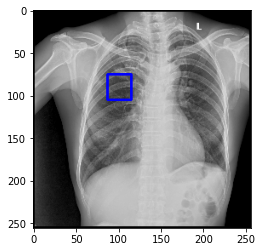

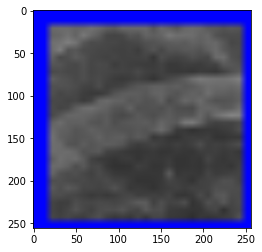

In [ ]:
x1 = 87 

y1 = 75 

x2 = 115

y2 = 105 

#Read image
img = cv2.imread(input + '26d1d5a0ef2e692c6340e74859ffdc53.jpg' )
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Draw bound box

img1 = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
plt.imshow(img1)
plt.show()
img2 = img[y1:y2,x1:x2]
img2 = cv2.resize(img2,(256,256))
plt.imshow(img2)
plt.show()



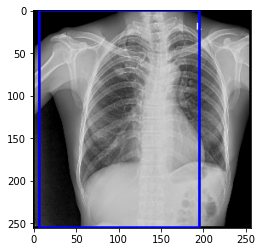

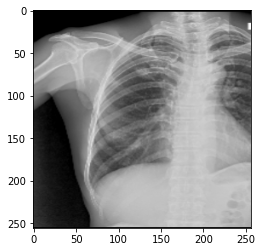

In [ ]:
			
x1 = 87 - 80
if x1 < 0 :
  x1 = 0
y1 = 75 -150
if y1 < 0:
  y1 = 0
x2 = 115  + 80
if x2 > 255 :
  x2 = 255
y2 = 105 + 150
if y2 > 255 :
  y2 = 255
# Read image
img = cv2.imread(input + '26d1d5a0ef2e692c6340e74859ffdc53.jpg' )
#img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Draw bound box
img2 = img[y1:y2,x1:x2]
#img2 = img[x1:x2,y1:y2]
img2 = cv2.resize(img2,(256,256))

img1 = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()


In [ ]:
input = '/content/drive/MyDrive/dataset/chest xray256'
output = '/content/drive/MyDrive/final work isa/Crop_pic'
csv = modify_size
csv

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0,0,0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0,0,0,0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,109,162,241,205
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,140,67,174,97
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0,0,0,0
...,...,...,...,...,...,...,...
46697,b53d1dd80e99ca6bcef9d592f65d3321,Pleural effusion,10,103,146,144,190
46698,26d1d5a0ef2e692c6340e74859ffdc53,Pulmonary fibrosis,13,87,75,115,105
46699,22672ab82c290c20b86863291e25ef6c,ILD,5,126,91,198,197
46700,db169d0be36123bd55b866d6aa73983b,Other lesion,9,109,92,149,139


In [ ]:
 # crop images and make a csv with new names
 image_id = []
 class_name = []
 class_id = []
 x_min = []
 y_min = []
 x_max = []
 y_max = []
 for indx , image in tqdm(enumerate(csv.image_id)):
  # get data of images 
  img_id = image
  path = os.path.join(input,img_id + '.jpg')
  class_nam = csv.loc[indx]['class_name']
  clas_id = csv.loc[indx]['class_id']
  x_minm = csv.loc[indx]['x_min']
  y_minm = csv.loc[indx]['y_min']
  x_maxm = csv.loc[indx]['x_max']
  y_maxm = csv.loc[indx]['y_max']
  #CROP No finding images 
  if class_nam == 'No finding':
    save_dir = os.path.join(output,img_id + '.jpg')
    image = cv2.imread(path)
    y1 = 10
    x1 = 20
    y2 = 245
    x2 = 245
    #CROP IMAGES AND RESIZE
    crop_image = image[y1:y2,x1:x2]
    crop_image = cv2.resize(crop_image,(256,256))
    cv2.imwrite(save_dir,crop_image)
    #ADD data to lists to make a csv file
    image_id.append(img_id)
    class_name.append(class_nam)
    class_id.append(clas_id)
    x_min.append(int(x_minm))
    y_min.append(int(y_minm))
    x_max.append(int(x_maxm))
    y_max.append(int(y_maxm))
    

  elif:
    #SEE if their duplicated data in finding images to ignore replace images
    if img_id in image_id:
      img_id = img_id + '_' + str(clas_id) 
      if img_id in image_id:
        pass
      else:
        save_dir = os.path.join(output,img_id + '.jpg')
        image = cv2.imread(path) 
        #USE x,y,w,h variables to pass to csv file the actual data
        x1 = x_minm - 80
        if x1 < 0 :
          x1 = 0
        y1 = y_minm - 150
        if y1 < 0:
          y1 = 0
        x2 = x_maxm + 80
        if x2 > 255:
          x2 = 255
        y2 = y_maxm + 150
        if y2 > 255:
          y2 = 255
        #CROP AND RESIZE
        crop_image = image[y1:y2,x1:x2]
        crop_image = cv2.resize(crop_image,(256,256))
        cv2.imwrite(save_dir,crop_image)
        #ADD new names and actual bound box
        image_id.append(img_id)
        class_name.append(class_nam)
        class_id.append(clas_id)
        x_min.append(int(x_minm))
        y_min.append(int(y_minm))
        x_max.append(int(x_maxm))
        y_max.append(int(y_maxm))


    else:
      save_dir = os.path.join(output,img_id + '.jpg')
      image = cv2.imread(path) 
      #USE x,y,w,h variables to pass to csv file the actual data
      x1 = x_minm - 80
      if x1 < 0 :
        x1 = 0
      y1 = y_minm - 150
      if y1 < 0:
        y1 = 0
      x2 = x_maxm + 80
      if x2 > 255:
        x2 = 255
      y2 = y_maxm + 150
      if y2 > 255:
        y2 = 255
      #CROP AND RESIZE
      crop_image = image[y1:y2,x1:x2]
      crop_image = cv2.resize(crop_image,(256,256))
      cv2.imwrite(save_dir,crop_image)
      #ADD new names and actual bound box
      image_id.append(img_id)
      class_name.append(class_nam)
      class_id.append(clas_id)
      x_min.append(int(x_minm))
      y_min.append(int(y_minm))
      x_max.append(int(x_maxm))
      y_max.append(int(y_maxm))    


Streaming output truncated to the last 5000 lines.
17957it [2:23:42,  1.89it/s]
17958it [2:23:43,  1.66it/s]
17963it [2:23:43,  2.15it/s]
17966it [2:23:44,  2.50it/s]
17968it [2:23:45,  2.53it/s]
17969it [2:23:46,  1.77it/s]
17972it [2:23:47,  2.10it/s]
17973it [2:23:47,  1.77it/s]
17974it [2:23:48,  1.58it/s]
17975it [2:23:49,  1.48it/s]
17979it [2:23:50,  1.88it/s]
17980it [2:23:50,  1.63it/s]
17986it [2:23:51,  2.12it/s]
17987it [2:23:52,  1.79it/s]
17990it [2:23:53,  2.11it/s]
17991it [2:23:54,  1.71it/s]
17995it [2:23:55,  2.12it/s]
17997it [2:23:55,  2.22it/s]
17999it [2:23:56,  2.27it/s]
18002it [2:23:56,  3.03it/s]
18009it [2:23:57,  3.69it/s]
18012it [2:23:58,  3.69it/s]
18018it [2:23:58,  5.13it/s]
18021it [2:23:59,  4.45it/s]
18023it [2:24:00,  3.65it/s]
18027it [2:24:01,  3.91it/s]
18029it [2:24:02,  3.27it/s]
18031it [2:24:02,  2.97it/s]
18033it [2:24:03,  2.80it/s]
18034it [2:24:04,  2.01it/s]
18036it [2:24:05,  2.15it/s]
18038it [2:24:06,  2.20it/s]
18039it [2:24:07,  1.

In [ ]:
#deleted 17,081 duplicated images in finding
len(class_id)

29621

In [ ]:
names_modify = pd.DataFrame({'image_id':image_id,
                                   'class_name':class_name,
                                   'class_id':class_id,
                                   'x_min':x_min,
                                   'y_min':y_min,
                                   'x_max':x_max,
                                   'y_max':y_max})

In [ ]:
names_modify

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0,0,0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0,0,0,0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,109,162,241,205
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,140,67,174,97
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0,0,0,0
...,...,...,...,...,...,...,...
29616,020717d6ab0b440b37978d9bace9f9b2_11,Pleural thickening,11,86,83,108,99
29617,6ed469a35361b49e04971347281bc312_0,Aortic enlargement,0,140,67,174,97
29618,a8db71e482a4dc2e83a1f5eecd9568cc_9,Other lesion,9,92,79,127,120
29619,b11960f23db725bb4ba6f6741586a5f7_11,Pleural thickening,11,105,83,131,99


In [ ]:
#names_modify.to_csv('/content/drive/MyDrive/final work isa/new_names_df.csv',index=False)

In [ ]:
d_0 = 0
d_1 = 0
d_2 = 0
d_3 = 0
d_4 = 0
d_5 = 0
d_6 = 0
d_7 = 0
d_8 = 0
d_9 = 0
d_10 = 0
d_11 = 0
d_12 = 0
d_13 = 0
d_14 = 0
for i,val in tqdm(enumerate(names_modify.class_id)):
  cls_nam = names_modify.loc[i]['class_id']
  if cls_nam == 0:
    d_0 +=1
  if cls_nam == 1:
    d_1 +=1
  if cls_nam == 2:
    d_2 +=1
  if cls_nam == 3:
    d_3 +=1
  if cls_nam == 4:
    d_4 +=1
  if cls_nam == 5:
    d_5 +=1
  if cls_nam == 6:
    d_6 +=1
  if cls_nam == 7:
    d_7 +=1
  if cls_nam == 8:
    d_8 +=1
  if cls_nam == 9:
    d_9 +=1
  if cls_nam == 10:
    d_10 +=1
  if cls_nam == 11:
    d_11 +=1
  if cls_nam == 12:
    d_12 +=1
  if cls_nam == 13:
    d_13 +=1
  if cls_nam == 14:
    d_14 +=1


0it [00:00, ?it/s]
683it [00:00, 6829.52it/s]
1310it [00:00, 6649.79it/s]
1893it [00:00, 6379.00it/s]
2471it [00:00, 6186.57it/s]
3029it [00:00, 5989.55it/s]
3623it [00:00, 5974.24it/s]
4171it [00:00, 5815.80it/s]
4794it [00:00, 5931.98it/s]
5434it [00:00, 6064.63it/s]
6041it [00:01, 6064.78it/s]
6630it [00:01, 5726.92it/s]
7195it [00:01, 5554.95it/s]
7766it [00:01, 5599.60it/s]
8376it [00:01, 5738.82it/s]
9019it [00:01, 5928.10it/s]
9621it [00:01, 5954.40it/s]
10217it [00:01, 5847.83it/s]
10820it [00:01, 5901.19it/s]
11428it [00:01, 5952.00it/s]
12055it [00:02, 6042.62it/s]
12681it [00:02, 6105.31it/s]
13293it [00:02, 6022.70it/s]
13896it [00:02, 5894.45it/s]
14487it [00:02, 5811.72it/s]
15075it [00:02, 5831.61it/s]
15659it [00:02, 5728.88it/s]
16233it [00:02, 5658.29it/s]
16851it [00:02, 5803.34it/s]
17433it [00:02, 5688.09it/s]
18015it [00:03, 5726.50it/s]
18616it [00:03, 5808.50it/s]
19198it [00:03, 5799.36it/s]
19789it [00:03, 5830.07it/s]
20373it [00:03, 5800.44it/s]
20967it [00

In [ ]:
print(f'0 : {d_0}\n1 : {d_1}')
print(f'2 : {d_2}\n3 : {d_3}')
print(f'4 : {d_4}\n5 : {d_5}')
print(f'6 : {d_6}\n7 : {d_7}')
print(f'8 : {d_8}\n9 : {d_9}')
print(f'10 : {d_10}\n11 : {d_11}')
print(f'12 : {d_12}\n13 : {d_13}')
print(f'14 : {d_14}')

0 : 4065
1 : 203
2 : 518
3 : 3103
4 : 383
5 : 477
6 : 705
7 : 1489
8 : 1006
9 : 1274
10 : 1243
11 : 2367
12 : 112
13 : 2070
14 : 10606


In [ ]:
# No finding = 10,606  AND Finding = 19,015 , Total = 29,621

In [ ]:
imag_id = []
labels = []
for i,val in tqdm(enumerate(names_modify.image_id)):
  name = val
  label = names_modify.loc[i]['class_name']
  imag_id.append(name)
  
  if label == 'No finding':
    labels.append('Normal')
  else:
    labels.append('Abnormal') 


0it [00:00, ?it/s]
586it [00:00, 5859.88it/s]
1229it [00:00, 6019.04it/s]
1816it [00:00, 5972.95it/s]
2455it [00:00, 6090.05it/s]
3057it [00:00, 6068.23it/s]
3686it [00:00, 6132.11it/s]
4335it [00:00, 6233.81it/s]
4964it [00:00, 6250.05it/s]
5585it [00:00, 6236.85it/s]
6186it [00:01, 6018.18it/s]
6783it [00:01, 6000.43it/s]
7393it [00:01, 6027.95it/s]
7989it [00:01, 5722.75it/s]
8560it [00:01, 5684.82it/s]
9162it [00:01, 5780.95it/s]
9781it [00:01, 5897.39it/s]
10374it [00:01, 5906.82it/s]
10965it [00:01, 5836.36it/s]
11549it [00:01, 5739.54it/s]
12139it [00:02, 5786.23it/s]
12719it [00:02, 5774.35it/s]
13298it [00:02, 5778.40it/s]
13877it [00:02, 5699.46it/s]
14496it [00:02, 5835.27it/s]
15129it [00:02, 5974.11it/s]
15772it [00:02, 6102.72it/s]
16385it [00:02, 5956.33it/s]
16983it [00:02, 5866.22it/s]
17574it [00:02, 5878.54it/s]
18195it [00:03, 5974.05it/s]
18822it [00:03, 6058.36it/s]
19432it [00:03, 6070.73it/s]
20040it [00:03, 5962.02it/s]
20652it [00:03, 6007.88it/s]
21282it [00

In [ ]:
len(imag_id)

29621

In [ ]:

binary_df = pd.DataFrame({'image_id':imag_id,'class_name':labels})

In [ ]:
binary_df

,image_id,class_name
0,50a418190bc3fb1ef1633bf9678929b3,Normal
1,21a10246a5ec7af151081d0cd6d65dc9,Normal
2,9a5094b2563a1ef3ff50dc5c7ff71345,Abnormal
3,051132a778e61a86eb147c7c6f564dfe,Abnormal
4,063319de25ce7edb9b1c6b8881290140,Normal
...,...,...
29616,020717d6ab0b440b37978d9bace9f9b2_11,Abnormal
29617,6ed469a35361b49e04971347281bc312_0,Abnormal
29618,a8db71e482a4dc2e83a1f5eecd9568cc_9,Abnormal
29619,b11960f23db725bb4ba6f6741586a5f7_11,Abnormal


In [ ]:
#binary_df.to_csv('/content/drive/MyDrive/final work isa/binary.csv',index=False)

In [ ]:
csv = pd.read_csv('/content/drive/MyDrive/train.csv')
len(csv.image_id.unique())

15000

In [ ]:
 # ASSIGN lists to make csv file for new data
 image_id = []
 class_name = []
 class_id = []
 x_min = []
 y_min = []
 x_max = []
 y_max = []
 for indx , image in tqdm(enumerate(csv.image_id.unique())):
        
        #GET data for each image
        img_id = image
        class_nam = csv.loc[indx]['class_name']
        clas_id = csv.loc[indx]['class_id']
        x_minm = csv.loc[indx]['x_min']
        y_minm = csv.loc[indx]['y_min']
        x_maxm = csv.loc[indx]['x_max']
        y_maxm = csv.loc[indx]['y_max']
        # DELETE duplicated images No finding
        if class_nam == 'No finding':
          pass
        else:
          #ADD data to lists
          image_id.append(img_id)
          class_name.append(class_nam)
          class_id.append(clas_id)
          x_min.append(x_minm)
          y_min.append(y_minm)
          x_max.append(x_maxm)
          y_max.append(y_maxm)
          


0it [00:00, ?it/s]
110it [00:00, 1094.87it/s]
207it [00:00, 1050.39it/s]
310it [00:00, 1044.18it/s]
409it [00:00, 1025.41it/s]
506it [00:00, 1008.06it/s]
610it [00:00, 1016.13it/s]
712it [00:00, 1017.10it/s]
805it [00:00, 987.50it/s] 
898it [00:00, 954.52it/s]
990it [00:01, 898.49it/s]
1088it [00:01, 920.69it/s]
1188it [00:01, 941.85it/s]
1287it [00:01, 954.53it/s]
1382it [00:01, 946.08it/s]
1478it [00:01, 948.83it/s]
1573it [00:01, 946.56it/s]
1668it [00:01, 938.91it/s]
1763it [00:01, 942.15it/s]
1858it [00:01, 930.43it/s]
1956it [00:02, 942.81it/s]
2051it [00:02, 927.82it/s]
2144it [00:02, 917.92it/s]
2236it [00:02, 887.03it/s]
2330it [00:02, 900.26it/s]
2429it [00:02, 924.09it/s]
2522it [00:02, 922.83it/s]
2615it [00:02, 907.77it/s]
2712it [00:02, 924.62it/s]
2805it [00:02, 921.38it/s]
2904it [00:03, 939.04it/s]
3009it [00:03, 967.86it/s]
3107it [00:03, 957.97it/s]
3206it [00:03, 963.98it/s]
3306it [00:03, 968.63it/s]
3404it [00:03, 957.39it/s]
3505it [00:03, 972.47it/s]
3605it [00

In [ ]:
len(image_id)

7955

In [ ]:
#MAKE dataframe from lists with new bound box
detection = pd.DataFrame({'image_id':image_id,
                      'class_name':class_name,
                      'class_id':class_id,
                      'x_min':x_min,
                      'y_min':y_min,
                      'x_max':x_max,
                      'y_max':y_max})

In [ ]:
#detection.to_csv('/content/drive/MyDrive/final work isa/detection.csv',index=False)

In [ ]:
def prepareDataFrame(train_df= detection):
    train_df = train_df.fillna(0)
    cols = ['image_id','label'] + list(['x_min','y_min','x_max','y_max']*14)
    return_df = pd.DataFrame(columns=cols)
    
    for image in tqdm(train_df.image_id.unique()):

        #get data frame contains all images for this image_id
        df = train_df.query("image_id==@image")

        #prepare labels for one_hot_encoding process
        label = np.zeros(14)

        #implement one_hot_encoding for each class for each image
        for cls in df.class_id.unique():
            label[int(cls)]=1
            
        #group bound boxes for each class then get single bound box by taking the mean of them 
        bboxes_df = df.groupby('class_id')[['x_min','y_min','x_max','y_max']].mean().round()
        
        bboxes_list = [0 for i in range(60)] #60 = 4*14
        for ind in list(bboxes_df.index):
            bboxes_list[4*ind:4*ind+4] = list(bboxes_df.loc[ind,:].values)
        return_df.loc[len(return_df),:] = [image]+[label]+bboxes_list[:-4]
    return return_df
train_df = prepareDataFrame()

In [ ]:
train_df[:10]

In [ ]:
#train_df.to_csv('/content/drive/MyDrive/New Work/CSV/multilabel_df.csv',index=False)

In [ ]:
test_images = os.listdir('/content/drive/MyDrive/final work isa/test')

train_csv = pd.read_csv('/content/drive/MyDrive/final work isa/csv/new_names_df.csv')
sav_dir = '/content/drive/MyDrive/final work isa/csv/train/'
train_csv

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,0,0,0,0
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,0,0,0,0
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,109,162,241,205
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,140,67,174,97
4,063319de25ce7edb9b1c6b8881290140,No finding,14,0,0,0,0
...,...,...,...,...,...,...,...
29616,020717d6ab0b440b37978d9bace9f9b2_11,Pleural thickening,11,86,83,108,99
29617,6ed469a35361b49e04971347281bc312_0,Aortic enlargement,0,140,67,174,97
29618,a8db71e482a4dc2e83a1f5eecd9568cc_9,Other lesion,9,92,79,127,120
29619,b11960f23db725bb4ba6f6741586a5f7_11,Pleural thickening,11,105,83,131,99


In [ ]:
train_csv['image_id'] = train_csv['image_id'] + '.jpg'

In [ ]:
 new_id = []
 class_name = []
 class_id = []
 x_min = []
 y_min = []
 x_max = []
 y_max = []
######################
# For multi csv
 image_multi = []
 name_multi = []
 id_multi = []
 x_min_multi = []
 y_min_multi = []
 x_max_multi = []
 y_max_multi = []

 for indx , image in tqdm(enumerate(train_csv.image_id)):
        
        # GEt data for each image
        img_id = image
        class_nam = train_csv.loc[indx]['class_name']
        clas_id = train_csv.loc[indx]['class_id']
        x_minm = train_csv.loc[indx]['x_min']
        y_minm = train_csv.loc[indx]['y_min']
        x_maxm = train_csv.loc[indx]['x_max']
        y_maxm = train_csv.loc[indx]['y_max']
        # check for duplicated images in No finding
        if img_id in test_images:
          pass
        else:
          if class_nam == 'No finding':
            #ADD data to lists
            new_id.append(img_id)
            class_name.append('normal')
          #to do multi_csv at same time
          else :
            new_id.append(img_id)
            class_name.append('abnormal')

            image_multi.append(img_id)
            name_multi.append(class_nam)
            id_multi.append(clas_id)
            x_min_multi.append(int(x_minm))
            y_min_multi.append(int(y_minm))
            x_max_multi.append(int(x_maxm))
            y_max_multi.append(int(y_maxm))


0it [00:00, ?it/s]
109it [00:00, 1084.85it/s]
219it [00:00, 1088.18it/s]
318it [00:00, 1054.54it/s]
419it [00:00, 1038.79it/s]
528it [00:00, 1052.73it/s]
627it [00:00, 1033.01it/s]
727it [00:00, 1021.78it/s]
840it [00:00, 1051.04it/s]
940it [00:00, 1022.03it/s]
1049it [00:01, 1041.35it/s]
1157it [00:01, 1052.06it/s]
1261it [00:01, 1042.10it/s]
1364it [00:01, 1008.11it/s]
1465it [00:01, 999.30it/s] 
1567it [00:01, 1003.17it/s]
1671it [00:01, 1012.54it/s]
1774it [00:01, 1016.82it/s]
1876it [00:01, 1006.53it/s]
1977it [00:01, 988.66it/s] 
2076it [00:02, 970.46it/s]
2186it [00:02, 1005.16it/s]
2289it [00:02, 1010.48it/s]
2391it [00:02, 1012.24it/s]
2493it [00:02, 1008.54it/s]
2595it [00:02, 1010.59it/s]
2697it [00:02, 978.59it/s] 
2796it [00:02, 972.80it/s]
2901it [00:02, 990.86it/s]
3002it [00:02, 994.97it/s]
3113it [00:03, 1026.50it/s]
3217it [00:03, 1023.96it/s]
3323it [00:03, 1033.32it/s]
3427it [00:03, 1024.55it/s]
3530it [00:03, 995.81it/s] 
3635it [00:03, 1009.96it/s]
3739it [00:03

In [ ]:
train = pd.DataFrame({'image_id':new_id,'class_name':class_name})

In [ ]:
train

,image_id,class_name
0,869f39afbdd8783b531530942eda8bad.jpg,normal
1,f55460fccf2d3c591f57f9c0de2c37c2.jpg,normal
2,cdbacab6bf30170ef0ba9fd1d195d270.jpg,normal
3,fb8e11c6b2886b2d41b379e0598669b9.jpg,abnormal
4,c6e0ab2470d98a6a8c701e774df929cc.jpg,normal
...,...,...
29556,020717d6ab0b440b37978d9bace9f9b2_11.jpg,abnormal
29557,6ed469a35361b49e04971347281bc312_0.jpg,abnormal
29558,a8db71e482a4dc2e83a1f5eecd9568cc_9.jpg,abnormal
29559,b11960f23db725bb4ba6f6741586a5f7_11.jpg,abnormal


In [ ]:
#train.to_csv(sav_dir + 'train_binary.csv',index=False)

In [ ]:
multi = pd.DataFrame({'image_id':image_multi,
                                   'class_name':name_multi,
                                   'class_id':id_multi,
                                   'x_min':x_min_multi,
                                   'y_min':y_min_multi,
                                   'x_max':x_max_multi,
                                   'y_max':y_max_multi})

In [ ]:
multi

,image_id,class_name,class_id,x_min,y_min,x_max,y_max
0,fb8e11c6b2886b2d41b379e0598669b9.jpg,Aortic enlargement,0,140,67,174,97
1,18ee9ef3baea468de2087e0edd85e919.jpg,Cardiomegaly,3,88,121,194,153
2,98d44861c84d532bcca874fcde5e5f42.jpg,Aortic enlargement,0,140,67,174,97
3,222b7757f55bee221e7aba69fc9928d0.jpg,Aortic enlargement,0,127,63,158,91
4,b9f09915187c2cc01e958da90d97ac89.jpg,Aortic enlargement,0,140,75,174,110
...,...,...,...,...,...,...,...
18954,020717d6ab0b440b37978d9bace9f9b2_11.jpg,Pleural thickening,11,86,83,108,99
18955,6ed469a35361b49e04971347281bc312_0.jpg,Aortic enlargement,0,140,67,174,97
18956,a8db71e482a4dc2e83a1f5eecd9568cc_9.jpg,Other lesion,9,92,79,127,120
18957,b11960f23db725bb4ba6f6741586a5f7_11.jpg,Pleural thickening,11,105,83,131,99


In [ ]:
#multi.to_csv(sav_dir+'multi_train.csv',index=False)

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/final work isa/csv/train/train_binary.csv')
train

,image_id,class_name
0,869f39afbdd8783b531530942eda8bad.jpg,normal
1,f55460fccf2d3c591f57f9c0de2c37c2.jpg,normal
2,cdbacab6bf30170ef0ba9fd1d195d270.jpg,normal
3,fb8e11c6b2886b2d41b379e0598669b9.jpg,abnormal
4,c6e0ab2470d98a6a8c701e774df929cc.jpg,normal
...,...,...
29556,020717d6ab0b440b37978d9bace9f9b2_11.jpg,abnormal
29557,6ed469a35361b49e04971347281bc312_0.jpg,abnormal
29558,a8db71e482a4dc2e83a1f5eecd9568cc_9.jpg,abnormal
29559,b11960f23db725bb4ba6f6741586a5f7_11.jpg,abnormal


In [ ]:
imag_id = []
labels = []
count_no = 0
count_fi = 0
10606
for i,val in tqdm(enumerate(train.image_id)):
  name = val
  label = train.loc[i]['class_name']
  
  
  if label == 'normal':
    if count_no < 10606:
      imag_id.append(name)
      labels.append('Normal')
      count_no += 1
  else:
    if count_fi < 10606:
      imag_id.append(name)
      labels.append('Abnormal')
      count_fi += 1 


0it [00:00, ?it/s]
967it [00:00, 9664.25it/s]
1881it [00:00, 9498.69it/s]
2726it [00:00, 9156.70it/s]
3659it [00:00, 9205.95it/s]
4636it [00:00, 9366.74it/s]
5686it [00:00, 9678.24it/s]
6728it [00:00, 9888.71it/s]
7775it [00:00, 10054.61it/s]
8825it [00:00, 10183.50it/s]
9824it [00:01, 10123.05it/s]
10812it [00:01, 9936.68it/s]
11840it [00:01, 10035.91it/s]
12865it [00:01, 10095.15it/s]
13867it [00:01, 9893.57it/s] 
14852it [00:01, 9782.79it/s]
15828it [00:01, 9756.59it/s]
16858it [00:01, 9913.28it/s]
17849it [00:01, 9730.80it/s]
18890it [00:01, 9923.60it/s]
19931it [00:02, 10064.66it/s]
20939it [00:02, 9871.44it/s] 
21928it [00:02, 9834.78it/s]
22913it [00:02, 9497.83it/s]
23867it [00:02, 9346.23it/s]
24871it [00:02, 9542.57it/s]
25844it [00:02, 9597.82it/s]
26847it [00:02, 9721.65it/s]
27885it [00:02, 9909.37it/s]
29561it [00:03, 9763.91it/s]


In [ ]:
train_binary = pd.DataFrame({'image_id':imag_id,'class_name':labels})

In [ ]:
train_binary

,image_id,class_name
0,869f39afbdd8783b531530942eda8bad.jpg,Normal
1,f55460fccf2d3c591f57f9c0de2c37c2.jpg,Normal
2,cdbacab6bf30170ef0ba9fd1d195d270.jpg,Normal
3,fb8e11c6b2886b2d41b379e0598669b9.jpg,Abnormal
4,c6e0ab2470d98a6a8c701e774df929cc.jpg,Normal
...,...,...
21203,7c0ddf911bdb68fca14d7172486827cb.jpg,Normal
21204,209e3a5c73c1195d805dd25d086b3c6d.jpg,Normal
21205,1bea772246421c37929f8cbc43dba729.jpg,Normal
21206,ae86eabab95525b41b8e79883ff1cef9.jpg,Normal


In [ ]:
train_binary.to_csv('/content/drive/MyDrive/final work isa/csv/equal_binary.csv',index = False)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/final work isa/csv/test.csv')

In [ ]:
imag_id = []
labels = []
for i,val in tqdm(enumerate(test.image_id)):
  name = val
  label = test.loc[i]['class_name']
  imag_id.append(name)
  
  if label == 'No finding':
    labels.append('Normal')
  else:
    labels.append('Abnormal') 



60it [00:00, 3598.25it/s]


In [ ]:
test_binary_df = pd.DataFrame({'image_id':imag_id,'class_name':labels})

In [ ]:
test_binary_df.to_csv('/content/drive/MyDrive/final work isa/csv/train/test_binary.csv',index = False)